In [2]:
import talib

In [3]:
import yfinance as yf

In [4]:
import matplotlib as mpl
# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [36]:
stock_data = yf.download('005930.KS','2020-01-01') #S&P500 데이터
stock_data.head(500)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50287.117188,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,50560.421875,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,50560.421875,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,50833.722656,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,51744.714844,23501171
...,...,...,...,...,...,...
2021-12-30,78900.0,79500.0,78100.0,78300.0,75977.804688,14236700
2022-01-04,78800.0,79200.0,78300.0,78700.0,76365.937500,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,75104.492188,25470640


## 단순 이동평균SMA

In [45]:
stock_data['SMA_20'] = talib.SMA(stock_data['Close'],20)
stock_data['SMA_60'] = talib.SMA(stock_data['Close'],60)
stock_data['SMA_120'] = talib.SMA(stock_data['Close'],120)
stock_data['SMA_200'] = talib.SMA(stock_data['Close'],200)

<Axes: xlabel='Date'>

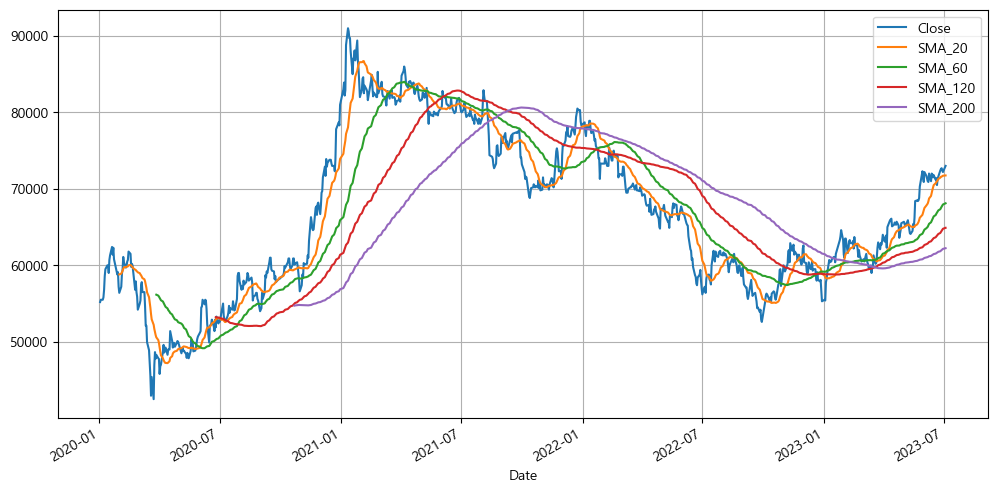

In [46]:
stock_data[['Close', 'SMA_20', 'SMA_60','SMA_120','SMA_200']].plot()

## 지수 이동평균 EMA

In [39]:
stock_data['EMA_20'] = talib.EMA(stock_data['Close'],20)
stock_data['EMA_60'] = talib.EMA(stock_data['Close'],60)
stock_data['EMA_120'] = talib.EMA(stock_data['Close'],120)
stock_data['EMA_200'] = talib.EMA(stock_data['Close'],200)

<Axes: xlabel='Date'>

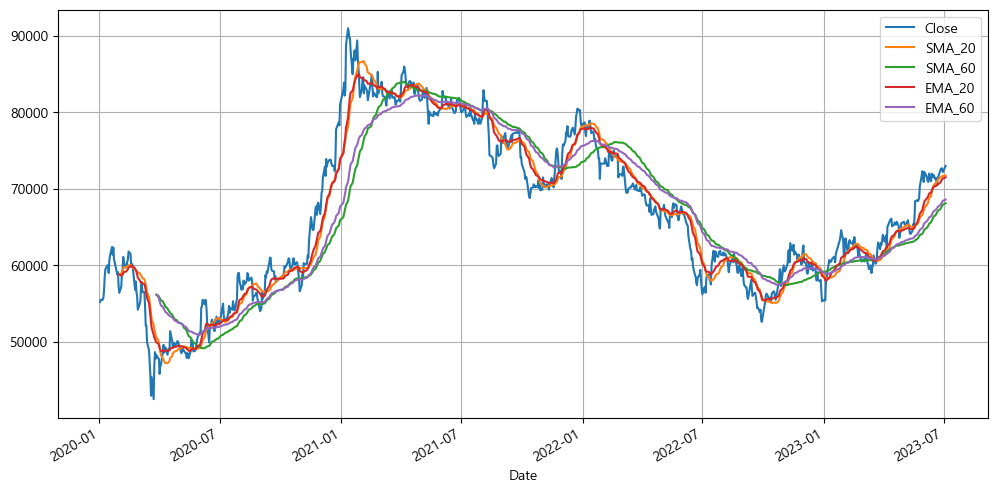

In [48]:
stock_data[['Close','SMA_20','SMA_60','EMA_20','EMA_60']].plot()

## RSI
### 일정기간 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타냄
- U : 가격 상승한 날의 상승폭
- D : 가격 하락한 날의 하락폭
- AVERAGE UP(AU) / AVERAGE DOWN(AD) : U 값과 D 값의 평균을 각각 구함
- RS : AU/AD를 통해 상대강도 구함

In [41]:
stock_data['RSI_14'] = talib.RSI(stock_data['Close'],14)
stock_data['RSI_14'].fillna(0, inplace=True)
stock_data['RSI_14']

Date
2020-01-02     0.000000
2020-01-03     0.000000
2020-01-06     0.000000
2020-01-07     0.000000
2020-01-08     0.000000
                ...    
2023-06-27    63.799093
2023-06-28    64.247026
2023-06-29    61.777414
2023-06-30    60.118302
2023-07-04    64.253738
Name: RSI_14, Length: 864, dtype: float64

C:\Users\com\AppData\Local\Temp\ipykernel_8740\2438818941.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


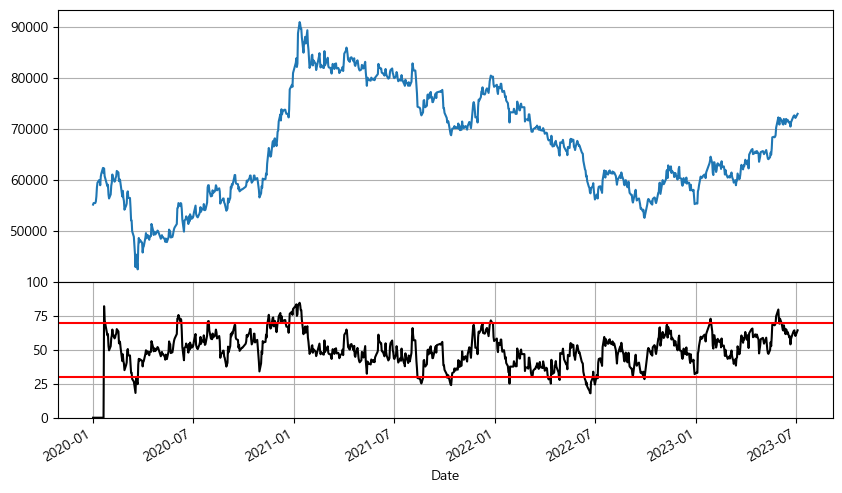

In [42]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# stock_data['RSI_14'] = talib.RSI(stock_data['Close'],14)
# stock_data['RSI_14'].fillna(0, inplace=True)
# fig = plt.subplots(figsize=(10,6), sharex=True)
# gs = gridspec.GridSpec(nrows=2,ncols=1, height_ratios=[2,1])

# ax1 = plt.subplot(gs[0])
# ax1 = stock_data['Close'].plot()
# ax1.set_xlabel('')
# ax1.axes.xaxis.set_ticks([])

# ax2 = plt.subplot(gs[1])
# ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0,100])
# ax2.axhline(y=70, color='r',linestyle='-')
# ax2.axhline(y=30, color='r',linestyle='-')
# ax2.set_xlabel
# plt.subplot_adjust(wspace=0, hspace=0)

# plt.show()

stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)
stock_data['RSI_14'].fillna(0, inplace=True)
fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

# 주가 나타내기
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 나타내기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='-')
ax2.axhline(y=30, color='r', linestyle='-')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()


[]

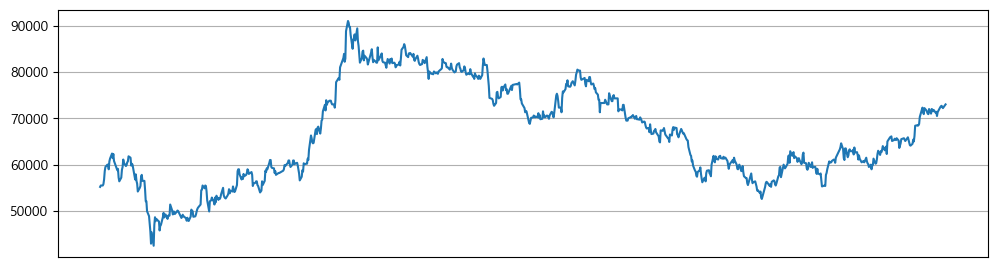

In [43]:
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])


AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

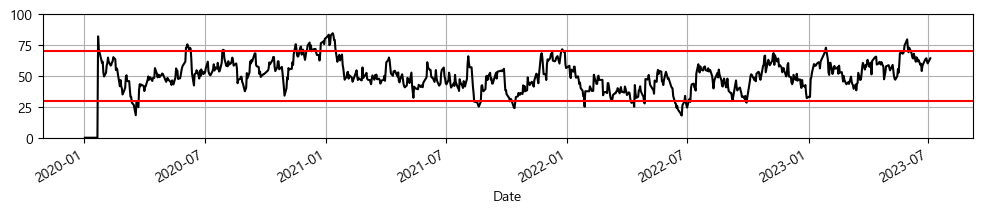

In [44]:
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0,100])
ax2.axhline(y=70, color='r',linestyle='-')
ax2.axhline(y=30, color='r',linestyle='-')
ax2.set_xlabel
plt.subplot_adjust(wspace=0, hspace=0)

## 볼린저 밴드
### 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드
- 중심 밴드 : n 기간 동안의 이동평균
- 상단 밴드 : 중심 밴드 기준 k표준편차 위
- 하단 밴드 : 중심 밴드 기준 k표준편차 아래
#### 정규분포를 따른 다는 가정 
- 데이터가 1표준편차 내에 있을 확률이 68%
- 데이터가 2표준편차 95%
- 데이터가 3표준편차 99%

In [ ]:
import pandas as pd

In [ ]:
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'],nbdevup=2, nbdevdn=2,timeperiod=20)

In [ ]:
bb = pd.concat([upper_2sd, mid_2sd, lower_2sd,stock_data['Close']], axis = 1)

In [ ]:
bb.columns = ['Upper band','Mid band', 'Lower band','Close']

In [ ]:
bb.plot(color = {
       'Upper band' : 'red',
       'Mid band' : 'yellow',
       'Lower band' : 'Green',
'Close':'Blue'})

In [ ]:
bb.plot()